<a href="https://colab.research.google.com/github/federicocampo/Monte-carlo/blob/main/Montecarlo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
#%matplotlib inline
from numpy.random import random as rand
from scipy.optimize import curve_fit

#Rigetto

Accettati: 39602 / 100000
Rifiutati: 60398 /100000


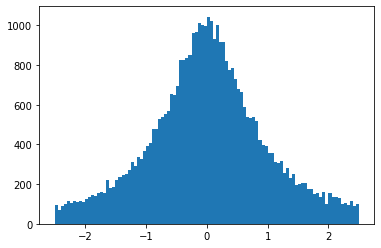

In [3]:
N = 100000
np.random.seed(42)

    
def P(x):
    return np.exp(1/(1+x**2))-1


x_ok=[]    
x_no=[]
M = math.e - 1

b = 1
for i in range(N):
    x =  5*(rand()-0.5)
    y = M * rand()
    if y < P(x) : x_ok.append(x)
    else: x_no.append(x)
    
print(f'Accettati: {len(x_ok)} / {N}')
print(f'Rifiutati: {len(x_no)} /{N}')

y, bins_edges, patches = plt.hist(x_ok, bins = 100)
plt.show()

#Rigetto ottimizzato con maggiorante 

(e-1)/(1+x^2)

Accettati: 773275 / 1000000
Rifiutati: 226725 /1000000


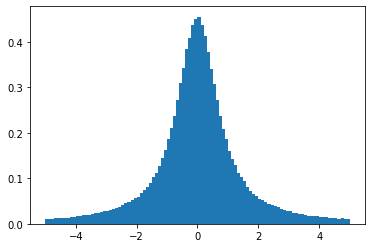

In [ ]:
N = 1000000
np.random.seed(42)



def G(x):
    return -1/(np.tan(np.pi * x))   

def g(x):
  return (math.e -1)/(1+x**2)


def P(x):
    return np.exp(1/(1+x**2))-1





x_ok=[]    
x_no=[]


b = 5
for i in range(N):
    r = rand()
    x = G(r)
    r = rand() * g(x)

    if r <= P(x) : x_ok.append(x)
    else: x_no.append(x)
    
print(f'Accettati: {len(x_ok)} / {N}')
print(f'Rifiutati: {len(x_no)} /{N}')

y, bins_edges, patches = plt.hist(x_ok,range=(-5, 5),  bins = 100, density = True)

plt.show()

# Fit alla distribuzione

0.2647177841067787 +\- 0.0002254359436804036
-0.0016753610247689102 +\- 0.0009367639655340643
Chiquadro fit = 0.001488725728923543


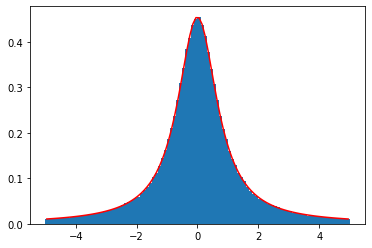

In [ ]:
def fun(x, a, b):
  return a*(np.exp(1/(1+(x-b)**2))-1)




bin_center = bins_edges[:-1] + np.diff(bins_edges) / 2

initial_values=(1,1 )
popt, pcov=curve_fit(fun, bin_center, y, p0=initial_values)
errpopt=np.sqrt(pcov.diagonal())

plt.hist(x_ok,range=(-5, 5), bins = 100, density = True)
plt.plot(bin_center, fun(bin_center, *popt), color='r')


for i in range(len(popt)):
    print(f'{popt[i]} +\- {errpopt[i]}')

dy = np.sqrt(y)
chisq=(  ((y - fun(bin_center, *popt) )/dy )**2  ).sum()
print(f'Chiquadro fit = {chisq}')